In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Deep learning/Project/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#  Checking missing values in dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Checking unique values in a column to categorize into continuous and categorical columns.
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Dropping columns which are not necessary for prediction
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [8]:
df.shape

(10000, 11)

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df["HasCrCard"] = df["HasCrCard"].astype(object)
df["IsActiveMember"] = df["IsActiveMember"].astype(object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 859.5+ KB


In [13]:
# let"s seperate the data in categorical and numerical features.
# categorical data
df_cat = df.select_dtypes("object")

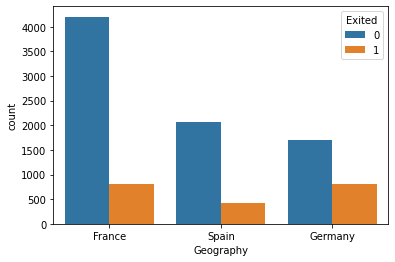

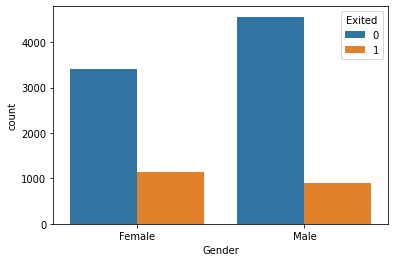

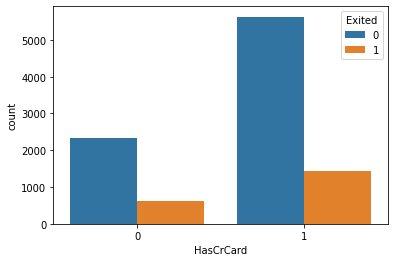

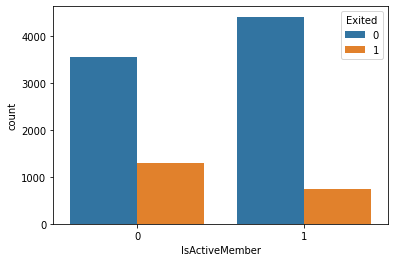

In [14]:
for col in df_cat:
  plt.figure()
  sns.countplot(data=df,x=col,hue="Exited")
  plt.show()

Observation.

1. Total number of customers who retained is highest from France and those who exited are highest from Germany, which means the bank needs to focus more on customers from Germany followed by France so that they don"t churn.
2. The proportion of female customers churning is greater than that of male customers.
3. Suprisingly,coustomers who had credit card churned more which can be a coincidence.
4. As usual, the inactive members churned more.

In [15]:
df_cat.head()

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1


In [16]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [17]:
df_cat.head()

,Geography,Gender,HasCrCard,IsActiveMember
0,0,0,1,1
1,2,0,0,1
2,0,0,1,0
3,0,0,0,0
4,2,0,1,1


In [18]:
# Exited is the target so we will drop it
# Numerical columns
df_num = df.select_dtypes(["int64","float64"]).drop("Exited",axis=1)

In [19]:
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10


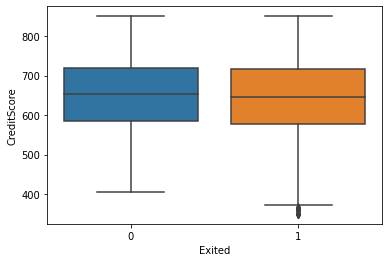

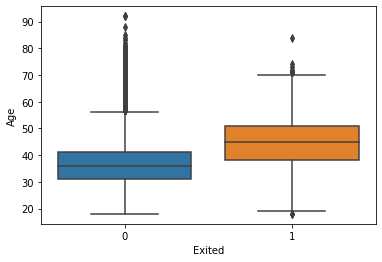

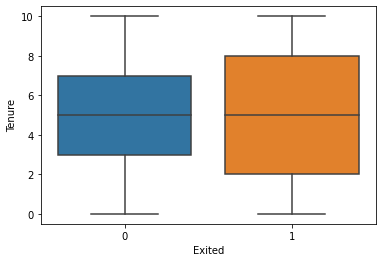

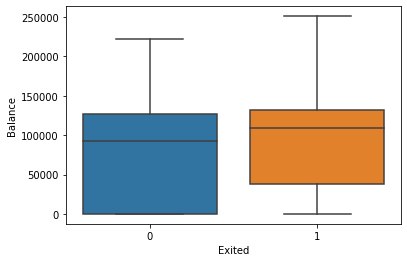

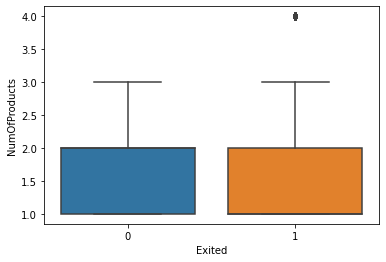

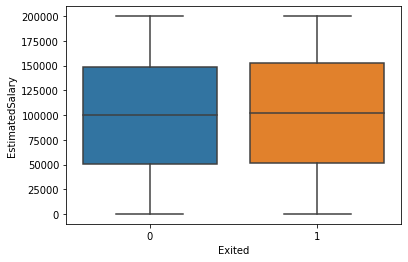

In [20]:
for col in df_num:
  plt.figure()
  sns.boxplot(data=df,y=col,x="Exited")
  plt.show()

From the above boxplots we can infer that-

1. There is no significant difference in Credit score,estimated salary and number of products they possess between customers who churned and who don"t.
2. The older customers are churning more than the young ones which indicates that the bank need to focus on older customers more.
3. Customers with tenure period with bank either too less or too more tends to churn more.
4. Customers who churned generally have more bank balance which is a bad indications as it will lead to capital deficiency in the bank.


------------------------------------------------------------
CreditScore -> -0.07159586676212397


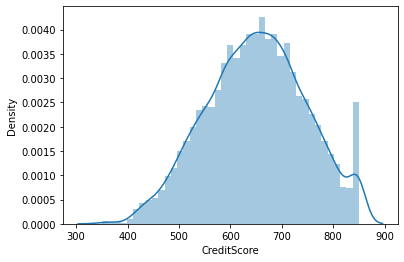

------------------------------------------------------------
Age -> 1.0111685586628079


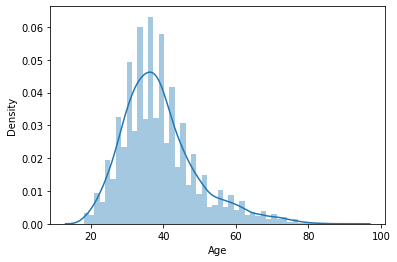

------------------------------------------------------------
Tenure -> 0.010989809189781041


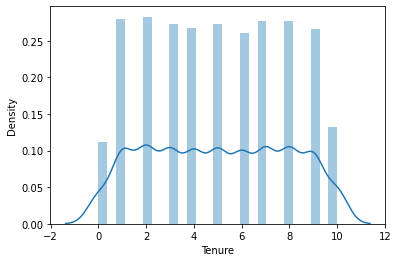

------------------------------------------------------------
Balance -> -0.14108754375291138


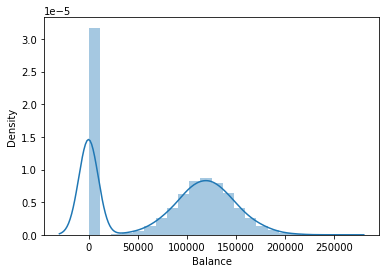

------------------------------------------------------------
NumOfProducts -> 0.745456048438949


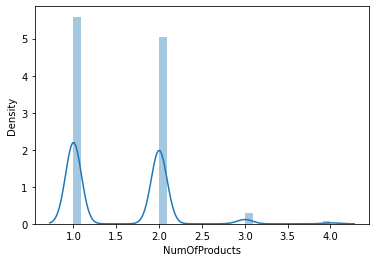

------------------------------------------------------------
EstimatedSalary -> 0.0020850448448748848


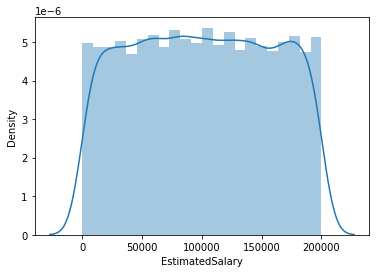

In [21]:
from scipy.stats import skew

for col in df_num:
  print("------"*10)
  print(col,"->",skew(df_num[col]))
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

In [22]:
for col in df_num:
  print(col,"->",skew(df_num[col]))

CreditScore -> -0.07159586676212397
Age -> 1.0111685586628079
Tenure -> 0.010989809189781041
Balance -> -0.14108754375291138
NumOfProducts -> 0.745456048438949
EstimatedSalary -> 0.0020850448448748848


In [23]:
#for col in df_num:
#  if skew(df_num[col]) > 0.5 or skew(df_num[col]) < -0.5:
#    df_num[col] = np.sqrt(df_num[col])

In [24]:
# Handling skewness.
df_num["CreditScore"] = np.square(df_num["CreditScore"])
df_num["Balance"] = np.square(df_num["Balance"])
df_num["Age"] = np.sqrt(df_num["Age"])

In [25]:
for col in df_num:
  print(col,"->",skew(df_num[col]))

CreditScore -> 0.27245793781346916
Age -> 0.5933159623197802
Tenure -> 0.010989809189781041
Balance -> 0.6711537174751321
NumOfProducts -> 0.745456048438949
EstimatedSalary -> 0.0020850448448748848


0    7963
1    2037
Name: Exited, dtype: int64
------------------------------------------------------------


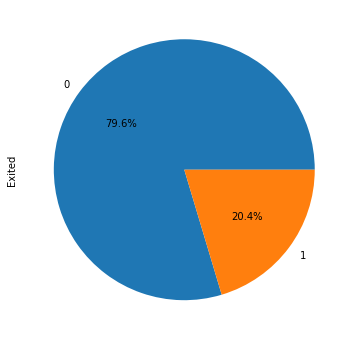

In [26]:
print(df["Exited"].value_counts())
print("------"*10)
plt.figure(figsize=(6,6))
df["Exited"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

From above pie chart, we can see that around 20% of customers had churned i.e exited and 80% retained.This shows that our dataset is a little imbalanced so we have to predict customer churn with a good accuracy as this 20% customers are of more interest to the bank.


In [27]:
df_new = pd.concat([df_cat,df_num],axis=1)

In [28]:
df_new.head()

,Geography,Gender,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0,0,1,1,383161,6.480741,2,0.000000e+00,1,101348.88
1,2,0,0,1,369664,6.403124,1,7.023757e+09,1,112542.58
2,0,0,1,0,252004,6.480741,8,2.549157e+10,3,113931.57
3,0,0,0,0,488601,6.244998,1,0.000000e+00,2,93826.63
4,2,0,1,1,722500,6.557439,2,1.575297e+10,1,79084.10


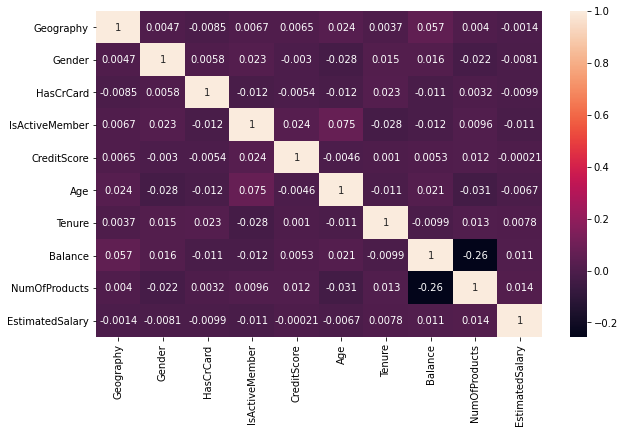

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

There is a Negative corr. between Balance and Number of Products columns.

In [30]:
X = df_new
y = df["Exited"]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

In [33]:
#mm = MinMaxScaler()
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Under Sampling.

In [34]:
rus = RandomUnderSampler(random_state=1)
X_sample1, y_sample1 = rus.fit_sample(X_train_ss,y_train)

In [35]:
pd.Series(y_sample1).value_counts()

1    1410
0    1410
dtype: int64

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Neural Network with Under Sampling.

In [37]:
model = Sequential()
model.add(Dense(16,input_shape=(X_sample1.shape[1],), activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [40]:
history1 = model.fit(X_sample1,y_sample1,epochs=50,batch_size=80)

Epoch 1/50
36/36 [==============================] - 1s 1ms/step - loss: 0.8366
Epoch 2/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 3/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6786
Epoch 4/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6665
Epoch 5/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6456
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6296
Epoch 7/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6288
Epoch 8/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6151
Epoch 9/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6071
Epoch 10/50
36/36 [==============================] - 0s 1ms/step - loss: 0.5937
Epoch 11/50
36/36 [==============================] - 0s 1ms/step - loss: 0.5992
Epoch 12/50
36/36 [==============================] - 0s 1ms/step - loss: 0.6005
Epoch 13/50
36/36 [==============================

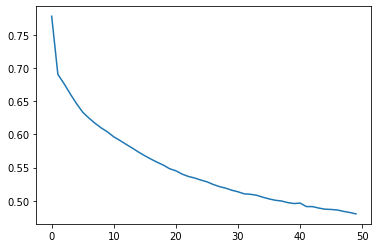

In [41]:
plt.plot(history1.history["loss"])

In [42]:
y_pred = model.predict(X_test_ss)

In [43]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      2373
           1       0.43      0.76      0.55       627

    accuracy                           0.74      3000
   macro avg       0.67      0.75      0.68      3000
weighted avg       0.82      0.74      0.76      3000



## Over Sampling.

In [45]:
ros = RandomOverSampler(random_state=1)
X_sample2, y_sample2 = ros.fit_sample(X_train_ss,y_train)

In [46]:
pd.Series(y_sample2).value_counts()

1    5590
0    5590
dtype: int64

## Neural Network with Over Sampling.

In [47]:
model = Sequential()
model.add(Dense(16,input_shape=(X_sample2.shape[1],), activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [50]:
history2 = model.fit(X_sample2,y_sample2,epochs=50,batch_size=80)

Epoch 1/50
140/140 [==============================] - 1s 1ms/step - loss: 0.6851
Epoch 2/50
140/140 [==============================] - 0s 1ms/step - loss: 0.5863
Epoch 3/50
140/140 [==============================] - 0s 1ms/step - loss: 0.5277
Epoch 4/50
140/140 [==============================] - 0s 1ms/step - loss: 0.5080
Epoch 5/50
140/140 [==============================] - 0s 1ms/step - loss: 0.5054
Epoch 6/50
140/140 [==============================] - 0s 1ms/step - loss: 0.4791
Epoch 7/50
140/140 [==============================] - 0s 1ms/step - loss: 0.4833
Epoch 8/50
140/140 [==============================] - 0s 1ms/step - loss: 0.4769
Epoch 9/50
140/140 [==============================] - 0s 1ms/step - loss: 0.4725
Epoch 10/50
140/140 [==============================] - 0s 1ms/step - loss: 0.4688
Epoch 11/50
140/140 [==============================] - 0s 1ms/step - loss: 0.4703
Epoch 12/50
140/140 [==============================] - 0s 1ms/step - loss: 0.4697
Epoch 13/50
140/140 [====

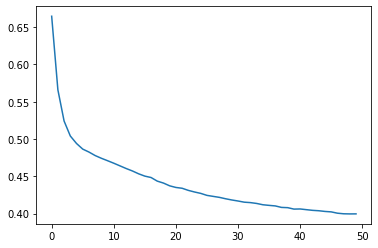

In [51]:
plt.plot(history2.history["loss"])

In [52]:
y_pred = model.predict(X_test_ss)

In [53]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2373
           1       0.50      0.71      0.58       627

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.79      0.80      3000



Conclusion

--  Dropping columns which are not necessary for prediction

--  Exploratory Data Analysis.

--  Spliting Traning and Testing Data.

--  Handling imballanced data with Under Sampler & Over Sampler.

--  Perdforming Neural Network with Under Sampling & Over Sampling.

--  Testing.  


We observe that with under sampling we get accurecy-74 and with over sampling we get accuracy- 79 which is much better than the under sampling as well as we get better precision, recall, f1-score as compare to undersampling.